# 📊 Visualização dos dados do dbtflix

Este notebook demonstra como consultar e visualizar os dados transformados pelo dbt,
utilizando Python (pandas) e DuckDB como backend.

In [1]:
# Instale as bibliotecas necessárias (se ainda não tiver):
# !pip install duckdb pandas matplotlib seaborn

In [2]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid", palette="muted")

## 📥 Conectar ao banco DuckDB gerado pelo dbt

In [3]:
# Ajusta o diretório de trabalho para a raiz do projeto, que tem a pasta data/
os.chdir("..")

db_path = "../dbt_movies.duckdb"
con = duckdb.connect(database=db_path, read_only=True)

## 🔍 Listar tabelas disponíveis

In [4]:
tables = con.execute("SHOW TABLES").df()
tables

,name
0,agg_genre_ratings
1,my_first_dbt_model
2,my_second_dbt_model
3,stg_movies


## 📊 Visualizar dados do modelo `agg_genre_ratings`

In [5]:
df = con.execute("SELECT * FROM agg_genre_ratings").df()
df.head()

,movie_genre,total_movies,avg_rating
0,Animation,10128,7.510430
1,Sci-Fi,5034,7.304382
2,Fantasy,10141,7.195307
3,Musical,5029,7.086115
4,Drama,20178,6.999754


## 📈 Média de ratings por gênero

Este gráfico apresenta a média das avaliações (ratings) dos filmes agrupados por gênero. Ele permite visualizar quais gêneros tendem a receber notas mais altas ou mais baixas, destacando variações na qualidade percebida entre diferentes categorias de filmes.

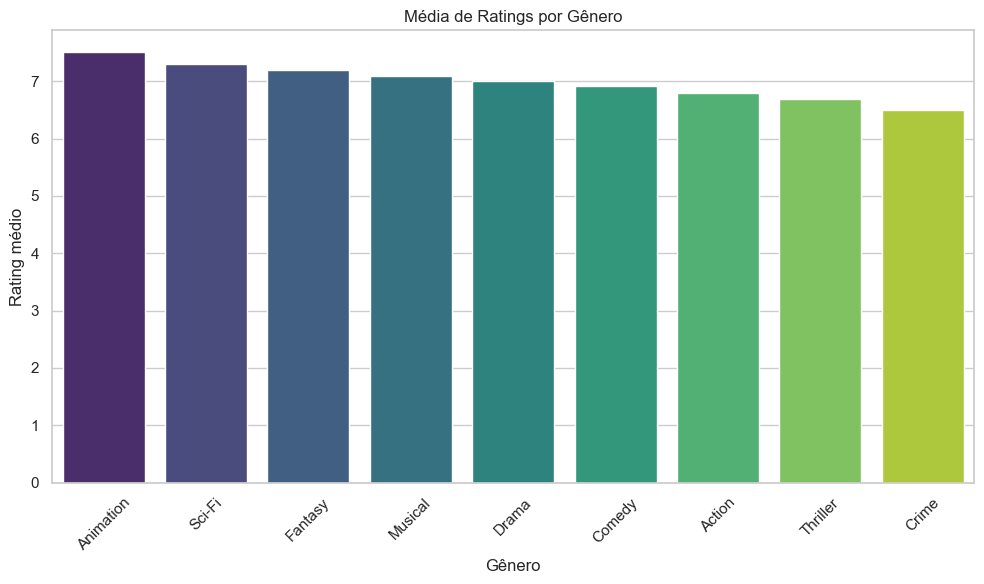

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="movie_genre", y="avg_rating", hue="movie_genre", palette="viridis", legend=False)
plt.title("Média de Ratings por Gênero")
plt.ylabel("Rating médio")
plt.xlabel("Gênero")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📊 Número de filmes por gênero
Este gráfico mostra a quantidade total de filmes disponíveis em cada gênero. Ele ajuda a entender quais gêneros são mais frequentes na base de dados e como os títulos estão distribuídos entre as categorias.

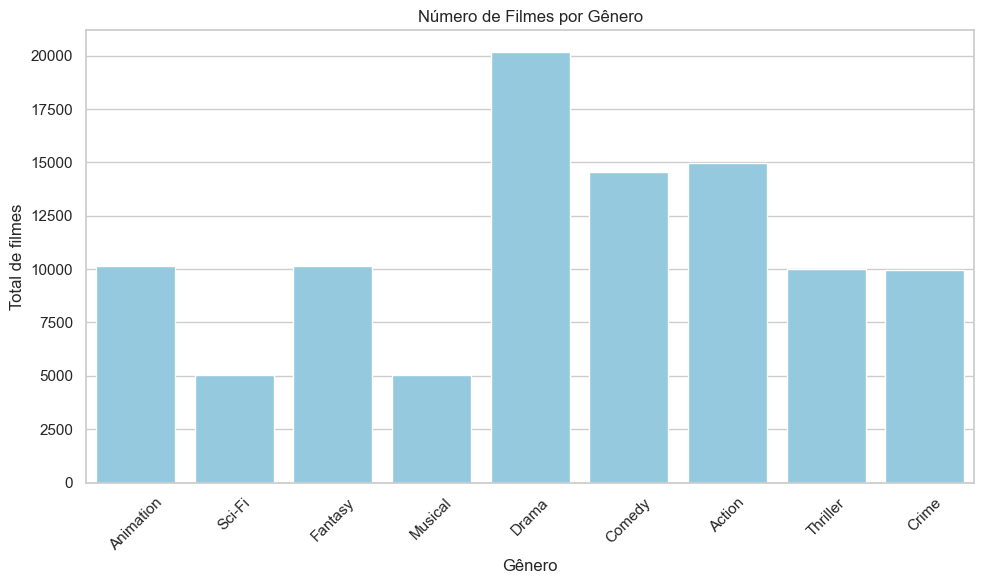

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="movie_genre", y="total_movies", color="skyblue")
plt.title("Número de Filmes por Gênero")
plt.ylabel("Total de filmes")
plt.xlabel("Gênero")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 Distribuição dos ratings (histograma)
Este histograma apresenta a frequência dos ratings dos filmes, mostrando como as avaliações estão distribuídas ao longo da escala de notas. É possível identificar padrões, como concentração de notas altas, baixas ou médias, e a dispersão geral das avaliações.

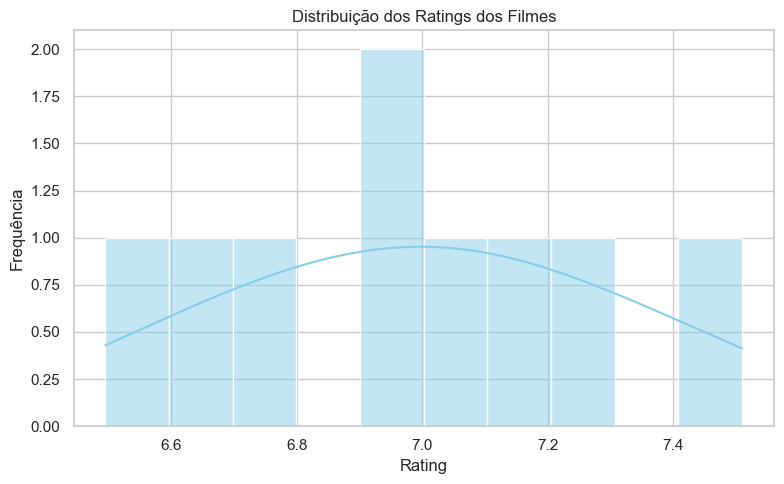

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['avg_rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição dos Ratings dos Filmes')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


## 📊 Visualizar dados do modelo `stg_movies`

In [9]:
df = con.execute("SELECT * FROM stg_movies").df()
df.head()

,movie_id,movie_title,movie_genre,movie_release_year,movie_rating
0,1,Agency know,Drama,1998,7.58
1,2,Face information man,Drama,1987,7.42
2,3,Hit,Thriller,1969,6.32
3,4,Imagine Mr,Comedy,1979,7.58
4,5,Pretty ball,Crime,1984,6.01


## 📈 Nota média por ano de lançamento
Este gráfico mostra a evolução da nota média dos filmes ao longo dos anos, permitindo analisar tendências na qualidade das produções com o passar do tempo. Ele evidencia se as avaliações têm melhorado, piorado ou se mantido estáveis.

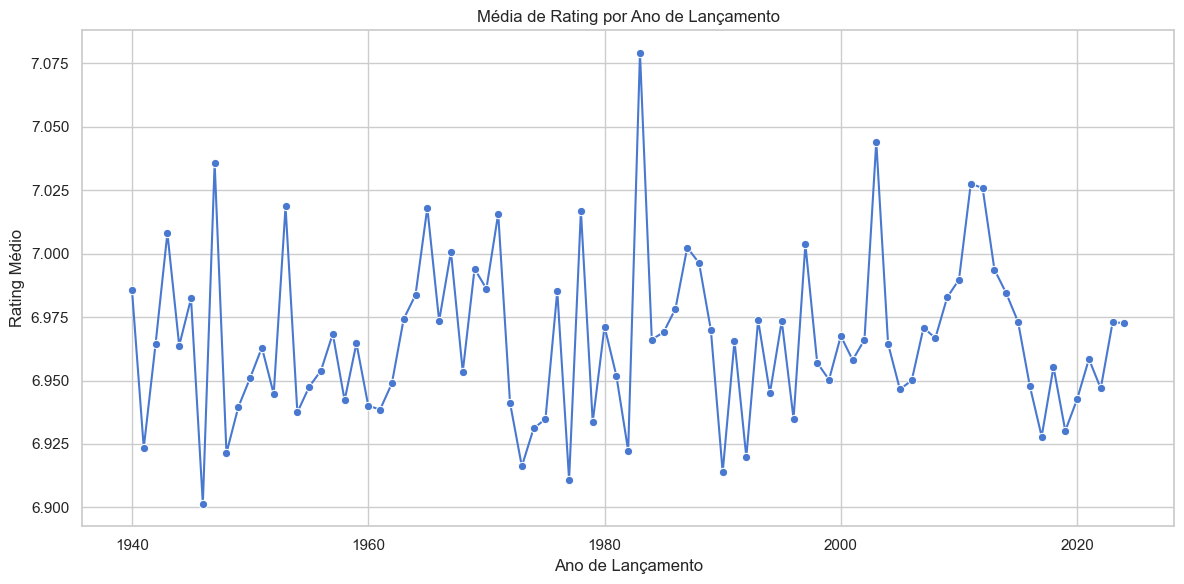

In [10]:
df_year = df.groupby('movie_release_year')['movie_rating'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_year, x='movie_release_year', y='movie_rating', marker='o')

plt.title('Média de Rating por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Rating Médio')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📈 Rating médio por gênero
Este gráfico apresenta a nota média dos filmes agrupados por gênero, destacando quais categorias tendem a receber melhores avaliações. Ajuda a identificar diferenças de qualidade percebida entre os tipos de filmes.

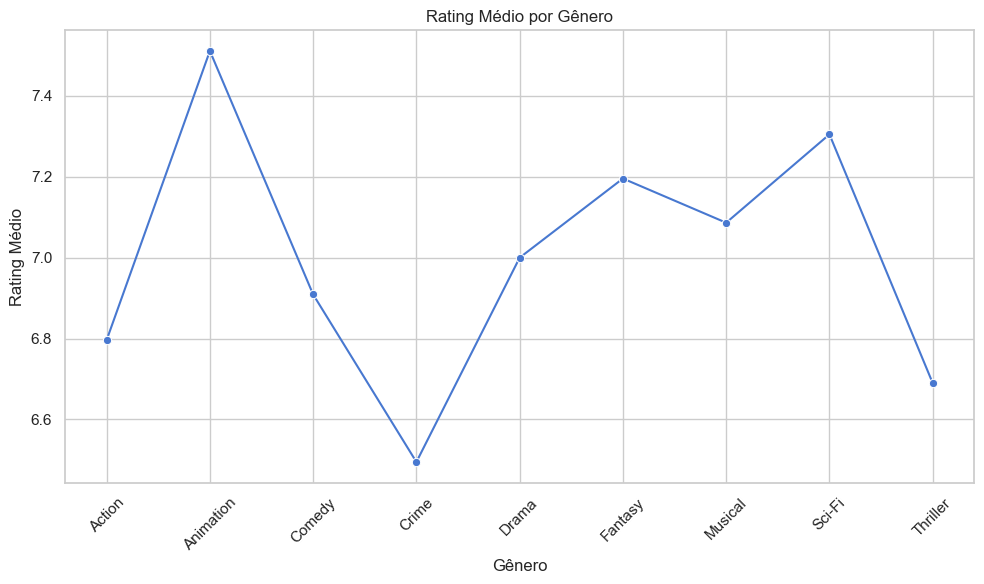

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('movie_genre')['movie_rating'].mean().reset_index(), x='movie_genre', y='movie_rating', marker='o')
plt.title('Rating Médio por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Rating Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 Boxplot de ratings por gênero
Mostra a distribuição completa dos ratings dentro de cada gênero, incluindo mediana, quartis e possíveis outliers.

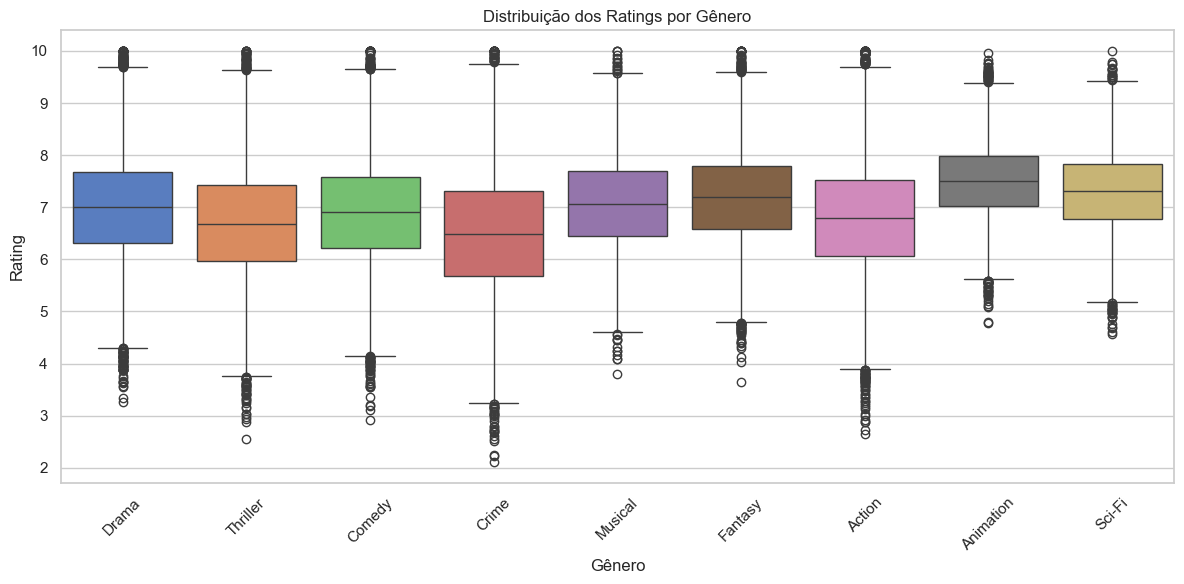

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='movie_genre', y='movie_rating', hue='movie_genre', legend=False)
plt.title('Distribuição dos Ratings por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📈 Quantidade de filmes por década
Agrupar os filmes por década (ex: anos 80, 90, 2000) ajuda a visualizar como a produção evoluiu historicamente e identificar períodos com maior ou menor volume de lançamentos.

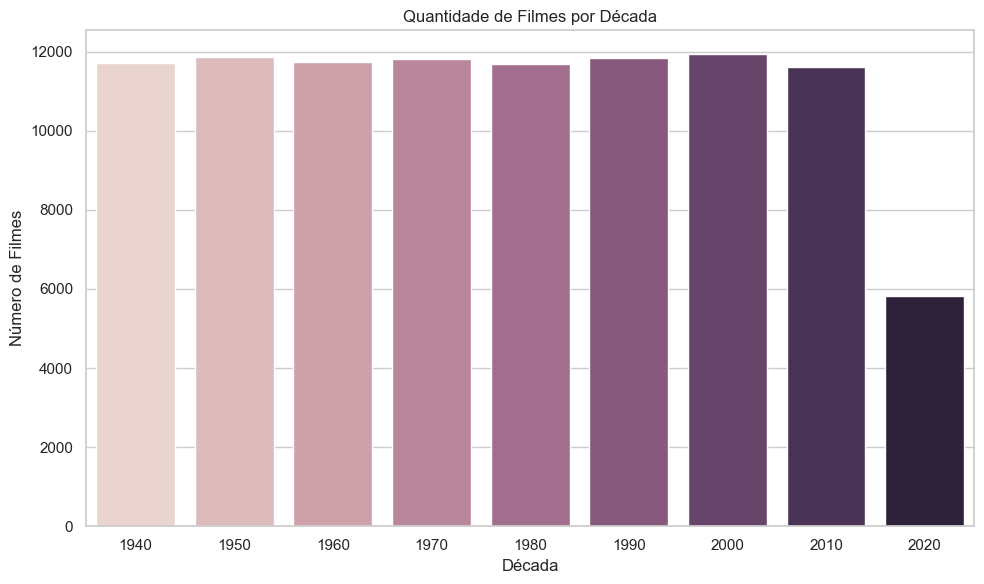

In [13]:
# Criar coluna década
df['decade'] = (df['movie_release_year'] // 10) * 10

plt.figure(figsize=(10,6))
sns.barplot(data=df.groupby('decade').size().reset_index(name='count'), x='decade', y='count', hue='decade', legend=False)
plt.title('Quantidade de Filmes por Década')
plt.xlabel('Década')
plt.ylabel('Número de Filmes')
plt.tight_layout()
plt.show()

## 📈 Top 10 filmes com maiores ratings
Um gráfico de barras horizontais listando os filmes com as maiores notas ajuda a identificar os “campeões”.

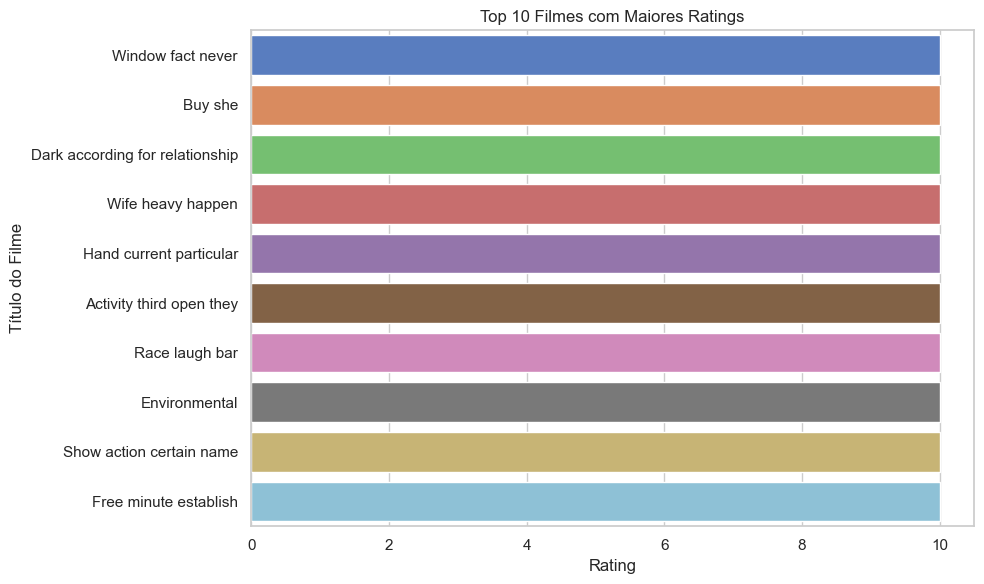

In [14]:
top10 = df.sort_values('movie_rating', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10, y='movie_title', x='movie_rating', hue='movie_title', legend=False)
plt.title('Top 10 Filmes com Maiores Ratings')
plt.xlabel('Rating')
plt.ylabel('Título do Filme')
plt.tight_layout()
plt.show()
